#### Imports

In [7]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [8]:
import pandas as pd

In [2]:
df = pd.read_csv("./Data/income.csv")
df["Einkommen"] = df["Einkommen"] / 1000

In [3]:
model = "Kauf ~ Einkommen"

In [4]:
y, X = dmatrices(model, df)

In [5]:
ols = sm.OLS(y,X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Kauf   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.573
Date:                Tue, 01 Dec 2020   Prob (F-statistic):             0.0254
Time:                        10:40:35   Log-Likelihood:                -18.984
No. Observations:                  30   AIC:                             41.97
Df Residuals:                      28   BIC:                             44.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2833      0.356     -0.795      0.433      -1.014       0.447
Einkommen      0.3861      0.164      2.361      0.025       0.051       0.721
==============================================================================
Omnibus:                       15.736   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.792
Skew:                           0.031   Prob(JB):                        0.248
Kurtosis:                       1.507   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
mi, ma = df["Einkommen"].min(), df["Einkommen"].max()
xs = np.linspace(mi,ma, 1000)
xs = sm.add_constant(xs)
ys = ols.predict(xs)

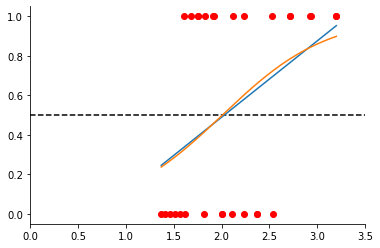

In [92]:
plt.scatter(x="Einkommen", y="Kauf", data=df, color="red")
plt.plot(xs[:,1], ys)
plt.plot(xs[:,1] ,ys2)
plt.xlim((0,3.5))
plt.hlines(0.5, xmin=0, xmax=3.5, linestyles="--", color="black")
sns.despine()

In [85]:
logit = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.600896
         Iterations 5


In [91]:
ys2 = logit.predict(xs)

In [93]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Kauf   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Nov 2020   Pseudo R-squ.:                  0.1303
Time:                        13:43:32   Log-Likelihood:                -18.027
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                   0.02012
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6707      1.843     -1.992      0.046      -7.283      -0.058
Einkommen      1.8272      0.882      2.073      0.038       0.099       3.555
==============================================================================
"""

In [96]:
yshat = 1 / (1 + np.exp(-1*(logit.params[0]+ logit.params[1]*xs)))[:,1]

In [98]:
a = 3

In [105]:
data = {"Einkommen": [2.752, 2.020, 1.573], "Käufe":[0.7,0.5,0.4]}
df = pd.DataFrame(data)

In [106]:
y, X = dmatrices("Käufe ~Einkommen", df)
logit = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.628372
         Iterations 5


In [107]:
logit.fittedvalues

array([ 0.82743814,  0.0441818 , -0.43411817])

In [111]:
a, b = logit.params
a,b

(-2.1172632780386573, 1.0700223175214771)

In [116]:
1/(1+ np.exp(-1*((a + b*2.530))))

0.6433406370648529

In [119]:
sm.GLM(y, X, family=sm.families.Binomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Käufe   No. Observations:                    3
Model:                            GLM   Df Residuals:                        1
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1.2997
Date:                Wed, 25 Nov 2020   Deviance:                   0.00076767
Time:                        14:41:16   Pearson chi2:                 0.000768
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1173      5.394     -0.393      0.695     -12.688       8.454
Einkommen      1.0700      2.518      0.425      0.671      -3.865       6.005
==============================================================================
"""

In [122]:
statsmodels.Bin

Init signature: sm.Logit(endog, exog, check_rank=True, **kwargs)
Docstring:     
Logit Model

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
check_rank : bool
    Check exog rank to determine model degrees of freedom. Default is
    True. Setting to False reduces model initialization time when
    exog.shape[1] is large.


Attributes
----------
endog : ndarray
    A reference to the endogenous response variable
exog : ndarray
    A reference to the exogenous design.
Source: 

In [121]:
sm.discrete_model

AttributeError: module 'statsmodels.api' has no attribute 'discrete_model'